Not all storage engines support foreign keys. In MySQL, **InnoDB** supports foreign keys, but **MyISAM** doesn’t. 

Let’s try to understand the concept through the example we have been working on in this course. 
* The **DigitalAssets** table consists of online accounts for actors in our **Actors** table.
* The two tables are related to each other by the columns **ID** and **ActorID**.
* Logically, it doesn’t make sense to have a row in the **DigitalAssets** table for an actor who is not listed in our **Actors** table.
* Ideally, we would want that anytime we add a new row to the **DigitalAssets** table, a corresponding entry in the **Actors** table exists with the same **ID** as the **ActorID** of the new row being added to the **DigitalAssets** table.
* Similarly, if we delete any actor from the **Actors** table, we’d want all rows in the **DigitalAssets** table associated with the actor to be deleted too.
* We can enforce these restrictions using the **foreign key constraint**.

The relation between the two tables is **one-to-many**. 
* A foreign key can be a column or a group of columns in a table that links to a column or a group of columns in another table.
* In this case, the **Actors** table is the referenced table and called the parent table, whereas the referencing table **DigitalAssets** is called the child table.

**SYNTAX**:

```mysql
CREATE TABLE childTable (

col1 <dataType>,

col2 <dataType>,

CONSTRAINT fkConstraint

FOREIGN KEY (col2)

REFERENCES parentTable(referencedCol);
```

---

**EXAMPLE**:

We can declare a column as a foreign key in a child table only if the column has an index defined on it (i.e., the column is defined as a primary key, unique, or key column in the parent table). If the column doesn’t have an index, it can’t be used as a foreign key. 

For our example, we can alter our **DigitalAssets** and set the **ActorID** column to be the foreign key as follows:

```mysql
ALTER TABLE DigitalAssets
ADD FOREIGN KEY (ActorId)
REFERENCES Actors(Id);
```

Now, if we add a row in the **DigitalAssets** table with an **actor ID** that doesn’t exist in the **Actors** table, an error is reported:

```mysql
INSERT INTO DigitalAssets
VALUES ("www.dummy.url", "instagram", "2030-01-01 00:00:00", 100);
```

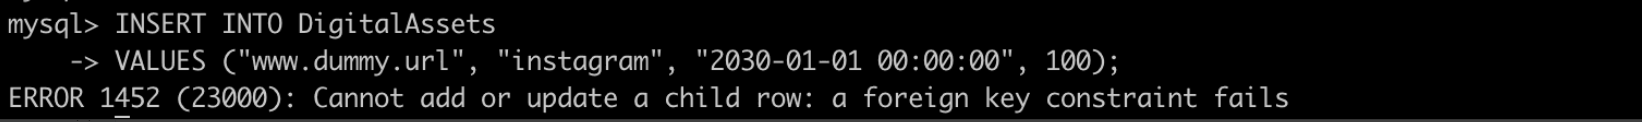

We can also create a foreign key constraint on a table itself. This is known as a **recursive** or **self-referencing foreign key constraint**. 

One example could be an employee's table, which has a column to identify the manager of an employee. 
* Since the manager is also an employee of the company, a row identifying him or her should also be present in the same table.
* The manager’s ID will reference the employee ID in the same column, and the employee ID will act as a foreign key.
